In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import collections
import concurrent
import gc
import io
import pathlib
import pickle
import random
import re
import warnings

import fastai
import fastai.vision
import h5py
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd
import png
import tqdm

import pipeline

In [6]:
filenames = list(pathlib.Path('/mnt/data1/smc_data/challenge2').glob('*/*.h5'))

In [108]:
png.Writer?

Init signature:
png.Writer(
    width=None,
    height=None,
    size=None,
    greyscale=<class 'png.Default'>,
    alpha=False,
    bitdepth=8,
    palette=None,
    transparent=None,
    background=None,
    gamma=None,
    compression=None,
    interlace=False,
    planes=None,
    colormap=None,
    maxval=None,
    chunk_limit=1048576,
    x_pixels_per_unit=None,
    y_pixels_per_unit=None,
    unit_is_meter=False,
)
Docstring:      PNG encoder in pure Python.
Init docstring:
Create a PNG encoder object.

Arguments:

width, height
  Image size in pixels, as two separate arguments.
size
  Image size (w,h) in pixels, as single argument.
greyscale
  Pixels are greyscale, not RGB.
alpha
  Input data has alpha channel (RGBA or LA).
bitdepth
  Bit depth: from 1 to 16 (for each channel).
palette
  Create a palette for a colour mapped image (colour type 3).
transparent
  Specify a transparent colour (create a ``tRNS`` chunk).
background
  Specify a default background colour (create a ``b

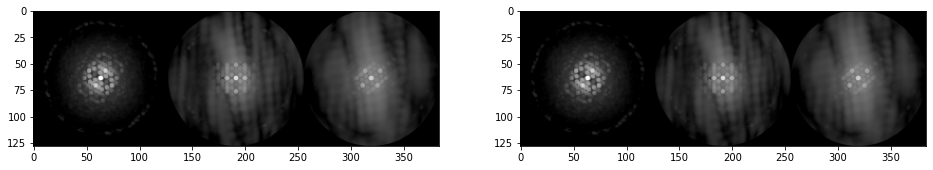

In [121]:
cfgs = [
    pipeline.ImageProducerConfig(
        h5_root='/mnt/data1/smc_data/challenge2',
        output_dir=None,
        scale_config=pipeline.ImageScalingConfig(
            type='log',
            type_param1=-17,
            type_param2=10,
            normalize_brightness=True,
            size=(128, 128),
        ),
        rotate=False,
    ),
    pipeline.ImageProducerConfig(
        h5_root='/mnt/data1/smc_data/challenge2',
        output_dir=None,
        scale_config=pipeline.ImageScalingConfig(
            type='log',
            type_param1=-17,
            type_param2=10,
            normalize_brightness=True,
            size=(128, 128),
        ),
        rotate=False,
    ),
]

for filename in filenames[:1]:
    _, axs = plt.subplots(1, len(cfgs), figsize=(16, 4))

    for i, (ax, cfg) in enumerate(zip(axs, cfgs)):

        image_producer = pipeline.ImageProducer(cfg)

        buf = io.BytesIO()
        
        h5buf = io.BytesIO()
        with open(filename, 'rb') as f:
            h5buf.write(f.read())
        h5buf.seek(0)

        # with h5py.File(filename, 'r') as h5f:
        with h5py.File(h5buf, 'r') as h5f:
            first_group = next(iter(h5f.values()))
            cbed_stack = first_group['cbed_stack']
            
            image_producer._save_image(cbed_stack, buf)

        buf.seek(0)
        rows = list(png.Reader(buf).read()[2])
        ax.imshow(rows, cmap='gray')

In [124]:
cfg = pipeline.ImageProducerConfig(
    h5_root='/mnt/data1/smc_data/challenge2',
    output_dir='/home/jin/sandbox/smc_challenge2/images/img9',
    scale_config=pipeline.ImageScalingConfig(
        type='log',
        type_param1=-17,
        type_param2=10,
        normalize_brightness=False,
        size=(128, 128),
    ),
    rotate=False,
)

pipeline.ImageProducer(cfg).produce(parallelism=8)

notify("DataPrep done")

  2%|▏         | 24/1138 [02:00<1:33:22,  5.03s/it]Process ForkProcess-6:
Process ForkProcess-7:
Process ForkProcess-11:
Process ForkProcess-9:
Process ForkProcess-5:
Process ForkProcess-8:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/concurrent/futures/process.

KeyboardInterrupt: 